# **FE - WEBSCRAPING Mini-Project**

In [1]:
# Importing all the Libraries required
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import io
import csv
import numpy as np
#import pint
import scipy.sparse as sp
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display, HTML
import matplotlib.pyplot as plt 

Note : In the output csv files which we get, 'name_beverages.csv' will contain the extracted data from the websites.
similarly, 'name_dataframe.csv' will contain the cleaned and sorted data of those particular websites. 
The integrated, cleaned and well ordered data is stored in 'final_dataset.csv' 

Note : The code for data Extraction process from the webpages takes couple of minutes to run.

 ## DATA ACQUISATION

 Initially, we need to scrape the data from three websites. We have selected beverages as the category for scraping and we have chosen Flipkart, Grofers and Big Basket websites.

### Scraping Flipkart for Beverages

In [2]:
response = requests.get("https://www.flipkart.com/search?q=beverages&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2")
#response
soup = BeautifulSoup(response.text, "lxml")
big_box = soup.find_all("div", {"class" : "_3liAhj"})
#len(big_box)
box = big_box[0]

title = box.find("a", {"class" : "_2cLu-l"}).text
price = box.find("div", {"class" : "_1vC4OE"}).text
rating = box.find("div", {"class" : "hGSR34"}).text
if box.find("div", {"class" : "VGWI6T"}) is not None:
    discount = box.find("div", {"class" : "VGWI6T"}).text.replace('% off', '')
    mrp = box.find("div", {"class" : "_3auQ3N"}).text
else:
    discount = 0
    
quantity = box.find("div", {"class" : "_1rcHFq"}).text
#mrp
#discount

category_url = {"Juices" : "https://www.flipkart.com/food-nutrition/beverages/fruit-drinks/juices/pr?sid=7jv%2Cldw%2Ckli%2Cy9h&q=beverages&otracker=categorytree&page={}",
                "Coffee" : "https://www.flipkart.com/food-nutrition/beverages/coffee/pr?sid=7jv%2Cldw%2Ckj3&q=beverages&otracker=categorytree&page={}",
                "Energy_drinks" : "https://www.flipkart.com/food-nutrition/health-nutrition/health-and-energy-drinks/pr?sid=7jv%2Cowt%2Ca39&q=beverages&otracker=categorytree&page={}",
                "Tea" : "https://www.flipkart.com/food-nutrition/beverages/tea/pr?sid=7jv%2Cldw%2Cmqx&q=beverages&otracker=categorytree&page={}",
               "Aerated_Drinks" : "https://www.flipkart.com/food-nutrition/beverages/aerated-drinks/pr?sid=7jv%2Cldw%2Cmno&q=beverages&otracker=categorytree&page={}",
                "Health_Drinks" : "https://www.flipkart.com/food-nutrition/beverages/health-drink-mixes/pr?sid=7jv%2Cldw%2Cfum&q=beverages&otracker=categorytree&page={}"}
                
                
#for category, url in category_url.items():
    #print(category)
    #print(url)

    
products = []
actual_prices = []
discounts = []
mrp_prices = []
quantities =[]
categories = []


for category, url in category_url.items():
    for page in range(1,5):
        response = requests.get(url.format(page))
        #print("Response code :{}",response)
        if "200" in str(response):
            soup = BeautifulSoup(response.text, "lxml")
            big_box = soup.find_all("div", {"class" : "_3liAhj"})

            for box in  big_box :
                title = box.find("a", {"class" : "_2cLu-l"}).text
                price = box.find("div", {"class" : "_1vC4OE"}).text
                if box.find("div", {"class" : "VGWI6T"}) is not None:
                    discount = box.find("div", {"class" : "VGWI6T"}).text.replace('% off', '')
                    mrp = box.find("div", {"class" : "_3auQ3N"}).text
                else:
                    discount = 0
                    mrp = price
                if box.find("div", {"class" : "_1rcHFq"}) is not None:  
                    quantity =box.find("div", {"class" : "_1rcHFq"}).text
                else:
                    quantity = None

                categories.append(category)
                actual_prices.append(price)
                products.append(title)
                discounts.append(discount)
                mrp_prices.append(mrp)
                quantities.append(quantity)

df1 = pd.DataFrame({ "Category": categories, "Product_Name" : products, "Quantity" : quantities, "Maximum_Retail_Price" : mrp_prices, "Discount_Percentage" : discounts, "Selling_Price" : actual_prices })
            
#df1

df1.to_csv('flipkart_beverages.csv')
print("Data Extracted")

Data Extracted


Here, we have extracted the beverages data from Flipkart website and stored into a csv file named : 'flipkart_beverages.csv'.

### Scraping Grofers for Beverages

In [3]:
with io.open("grofers_beverages.csv","w",encoding="utf8") as f1:
    f1.write('Category|Product_Name|Quantity|Maximum_Retail_Price|Discount_Percentage|Selling_Price|Vendor\n')
    f1.close()

cookies = {
    'ajs_anonymous_id': '%2288ac9e32-a317-4a64-afa2-a5c4c4a885e2%22',
    'rl_anonymous_id': '%22e7999309-3898-48ef-8083-30ad08a0b2cd%22',
    'rl_user_id': '%22%22',
    '_gcl_au': '1.1.550897354.1588044507',
    '_ga': 'GA1.2.910577242.1588044507',
    '_hjid': '2b8fbf1d-d3bc-41cd-90db-2551f54a4a2f',
    '_fbp': 'fb.1.1588044507947.1467708287',
    'WZRK_G': '7d8329d451af461691974a2e351e1ef4',
    'gr_1_locality': '956',
    'gr_1_lat': '17.4138277',
    'gr_1_lon': '78.43975840000007',
    'gr_1_deviceId': 'ef01e370-7ab1-4d86-af97-c30c5ad49451',
    '__cfduid': 'de8169ac89daa161074c6cb6a2628461d1590918193',
    '_gid': 'GA1.2.1316096851.1590918194',
    '__cfruid': '89bcb4bfe300285501f596cb8d970a2d4207e2b1-1590991355',
    'BCSI-CS-b14b6fa217d7f72e': '1',
    '_sp_ses.bf41': '*',
    '_hjAbsoluteSessionInProgress': '1',
    '_uetsid': 'ff2ce0d2-9414-aed4-7d85-0c1ee8b9c4a7',
    '__insp_wid': '180455199',
    '__insp_slim': '1590998748176',
    '__insp_nv': 'true',
    '__insp_targlpu': 'aHR0cHM6Ly9ncm9mZXJzLmNvbS8%3D',
    '__insp_targlpt': 'T25saW5lIEdyb2NlcnkgU3RvcmU6IEJ1eSBPbmxpbmUgR3JvY2VyeSBmcm9tIEluZGlhJ3MgQmVzdCBPbmxpbmUgU3VwZXJtYXJrZXQgYXQgRGlzY291bnRlZCBSYXRlcyB8IEdyb2ZlcnM%3D',
    '__insp_norec_sess': 'true',
    'AMP_TOKEN': '%24NOT_FOUND',
    '_sp_id.bf41': 'c7c8855cc967b4ba.1588044507.6.1590998755.1590991972.e5a08f26-bab1-42ba-b0da-65579caa484c',
    'WZRK_S_RKR-99Z-ZK5Z': '%7B%22p%22%3A1%2C%22s%22%3A1590998749%2C%22t%22%3A1590998760%7D',
}

headers = {
    'Connection': 'keep-alive',
    'app_client': 'consumer_web',
    'device_id': 'ef01e370-7ab1-4d86-af97-c30c5ad49451',
    'Content-Type': 'application/json',
    'access_token': 'null',
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
    'auth_key': '533e7d249adc4058cf6ade21a61cf87bfd5c0214b1d75fe47ff9c7eab91cd0dd',
    'Accept': '*/*',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Dest': 'empty',
    'Referer': 'https://grofers.com/cn/beverages/cid/12',
    'Accept-Language': 'en-US,en;q=0.9',
}

params = (
    ('l0_cat', '12'),
    ('start', '96'),
    ('next', '48'),
)

response = requests.get('https://grofers.com/v4/search/merchants/26659/products/', headers=headers, params=params, cookies=cookies, verify=False)
#print(response)
#print(response.text)

data=json.loads(response.text)
v_meta_result_cnt=data["meta"]

vmeta_result_cnt=v_meta_result_cnt['result_count']
#print(vmeta_result_cnt)

params = (
    ('l0_cat', '12'),
    ('start', '0'),
    ('next', vmeta_result_cnt),
)

response1 = requests.get('https://grofers.com/v4/search/merchants/26659/products/', headers=headers, params=params, cookies=cookies, verify=False)

data1=json.loads(response1.text)
data2=data1["result"]["products"]

#print(len(data2))

counter=len(data2)
for i in range(counter):
    data3=data2[i]
    data4=data3["variant_info"]
    counter1=len(data4)
    for j in range(counter1):
        data5=data4[j]
        leaf_category=data5["leaf_category"]
        Category=leaf_category["name"]
        Product_Name=data5["line_1"]
        Quantity=data5["unit"]
        Maximum_Retail_Price=data5["mrp"]
        Discount=data5["offer"]
        Selling_Price=data5["price"]
        Vendor = 'Grofers'
        Record=str(Category) + "|" + str(Product_Name) + "|" + str(Quantity) + "|" + str(Maximum_Retail_Price) + "|" + str(Discount) + "|" + str(Selling_Price) + "|" + str(Vendor) + "\n"
        with io.open("grofers_beverages.csv","a",encoding="utf8") as f1:
            f1.write(Record)
            f1.close()
print("Data Extracted")

/opt/anaconda3/envs/jupyter/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'grofers.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/anaconda3/envs/jupyter/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'grofers.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Data Extracted


We have extracted the beverages items from grofers website and stored it in a csv file named : 'grofers_beverages.csv'

### Scraping BigBasket for Beverages

In [4]:
baseurl = "https://www.bigbasket.com/pc/beverages/health-drink-supplement/?nc=ct-fa&sid=_ptl1o2ibWQBoWMEqHNrdV9saXN0kKJuZsOiY2OjMzUxqWJhdGNoX2lkeACiYW_ConVywqJhcMOibHTNCc2hb6pwb3B1bGFyaXR5pXNyX2lkAaNtcmkD"
bb_beverages = requests.get(baseurl)
bb_beverages.status_code
#bb_beverages.content

soup = BeautifulSoup(bb_beverages.content, 'html.parser')
#print (soup.prettify())

with io.open('bb_beverages.csv','w', encoding = 'utf8') as f1:
             f1.write ('Category|Product_Name|Quantity|Maximum_Retail_Price|Discount_Percentage|Selling_Price|Vendor\n')
             f1.close()

link = 'https://www.bigbasket.com/product/get-products/?slug=beverages&page=2&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc'

i = 2
while (i<27):
    link2 = requests.get('https://www.bigbasket.com/product/get-products/?slug=beverages&page='+str(i)+'&tab_type=["all"]&sorted_on=popularity&listtype=pc')
    data = json.loads(link2.text)
    data = data["tab_info"]["product_map"]["all"]["prods"]
    data_len = len(data)
    i = i + 1
    for m in range (data_len):
        data1 =data[m]
        data2 = data1["all_prods"]
        #print(data2)
        #print (m)
        if (len(data2)<1):
            #sku = data1['sku']
            Category = data1['llc_n']
            Product_Name = data1['p_desc']
            Quantity = data1['w']
            Maximum_Retail_Price = data1['mrp']
            Selling_Price = data1['sp']
            Discount_Percentage = data1['dis_val']
            Vendor = 'Bigbasket'
            scrap_data = str(Category)+ "|" +str(Product_Name)+ "|" +str(Quantity)+ "|" +str(Maximum_Retail_Price)+ "|" +str(Discount_Percentage)+ "|" +str(Selling_Price)+ "|" +str(Vendor)+ "\n"
            with io.open("bb_beverages.csv", "a", encoding = "utf8") as f2:
                f2.write(scrap_data)
                f2.close()
        else:
            for k in range (len(data2)):
                data3 = data2[k]
                #sku=data3['sku'], tlc_s, tlc_n, llc_s, llc_n, pc_n
                Category = data3['llc_n']
                Product_Name = data3['p_desc']
                Quantity = data3["w"]
                Maximum_Retail_Price = data3["mrp"]
                Selling_Price = data3["sp"]
                Discount_Percentage = data3["dis_val"]
                Vendor = 'Bigbasket'

                scrap_data = str(category)+ "|" +str(Product_Name)+ "|" +str(Quantity)+ "|" +str(Maximum_Retail_Price)+ "|" +str(Discount_Percentage)+ "|" +str(Selling_Price)+ "|" +str(Vendor)+ "\n"
                with io.open("bb_beverages.csv", "a", encoding = "utf8") as f2:
                    f2.write(scrap_data)
                    f2.close()
print ("Data Extracted")

Data Extracted


Smilarly, we have extracted the beverages data from the big basket website as well and stored it in a csv file named : 'bb_beverages'

## DATA CLEANSING

Now, we need to clean all the three datasets in order to ingetrate them into one dataset

### Performing Data Cleaning on Flipkart Dataset

In [5]:
df1.head(5)

,Category,Product_Name,Quantity,Maximum_Retail_Price,Discount_Percentage,Selling_Price
0,Juices,Real Fruit Juice - Litchi,1 L,₹104,8,₹95
1,Juices,Modicare Well Noni Juice With Kokum,1000 ml,₹500,10,₹450
2,Juices,Bavaria Premium Non Alcoholic Beer,24 x 13.75 ml,"₹2,999",23,"₹2,299"
3,Juices,"Donelli Non-Alcoholic Wine ,White Grape Juice,...",750 ml,₹799,43,₹449
4,Juices,Akiva Superfoods Lemon Honey Cinnamn Health Sh...,60 x 40 ml,"₹2,400",4,"₹2,299"


In [6]:
df1.dtypes

Category                object
Product_Name            object
Quantity                object
Maximum_Retail_Price    object
Discount_Percentage     object
Selling_Price           object
dtype: object

In [7]:
# Removing symbols from Maximum_Retail_Price column to see only numbers
df1['Maximum_Retail_Price'] = df1['Maximum_Retail_Price'].str.strip('₹')
df1['Maximum_Retail_Price'] = df1['Maximum_Retail_Price'].str.replace(',','')
#df1.head(2)

In [8]:
# Removing symbols from Selling_Price column to see only numbers
df1['Selling_Price'] = df1['Selling_Price'].str.strip('₹')
df1['Selling_Price'] = df1['Selling_Price'].str.replace(',','')
df1.head(2)

,Category,Product_Name,Quantity,Maximum_Retail_Price,Discount_Percentage,Selling_Price
0,Juices,Real Fruit Juice - Litchi,1 L,104,8,95
1,Juices,Modicare Well Noni Juice With Kokum,1000 ml,500,10,450


In [9]:
#Converting Datatype of numerical columns to float
df1["Maximum_Retail_Price"] = df1["Maximum_Retail_Price"].astype(str).astype(float)
df1["Selling_Price"] = df1["Selling_Price"].astype(str).astype(float)
df1["Discount_Percentage"] = df1["Discount_Percentage"].astype(str).astype(float)

In [10]:
# Splitting a column into two which is having dual information
df1[['Quant', 'Flavour']] = df1.Quantity.str.split(",", n= 1, expand = True)
#df1.head(10)

In [11]:
# Deleting the original column and renaming the derived column
del df1['Quantity']
df1 = df1.rename(columns={"Quant" : "Quantity"})

In [12]:
# Adding a new column to the dataframe
df1['Vendor'] = 'Flipkart'

In [13]:
# Viewing the cleaned and completed dataframe
df1 = df1[['Category', 'Product_Name', 'Quantity', 'Maximum_Retail_Price', 'Discount_Percentage', 'Selling_Price', 'Vendor']]
df1

,Category,Product_Name,Quantity,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
0,Juices,Real Fruit Juice - Litchi,1 L,104.0,8.0,95.0,Flipkart
1,Juices,Modicare Well Noni Juice With Kokum,1000 ml,500.0,10.0,450.0,Flipkart
2,Juices,Bavaria Premium Non Alcoholic Beer,24 x 13.75 ml,2999.0,23.0,2299.0,Flipkart
3,Juices,"Donelli Non-Alcoholic Wine ,White Grape Juice,...",750 ml,799.0,43.0,449.0,Flipkart
4,Juices,Akiva Superfoods Lemon Honey Cinnamn Health Sh...,60 x 40 ml,2400.0,4.0,2299.0,Flipkart
...,...,...,...,...,...,...,...
669,Health_Drinks,pro360 SLIM STRAWBERRY FLAVOUR,500 g,645.0,10.0,575.0,Flipkart
670,Health_Drinks,pro360 DIABETIC ROASTED COFFEE NUTRITIONAL BEV...,250 g,370.0,12.0,325.0,Flipkart
671,Health_Drinks,TruNativ FROAT Very Berry,3 x 40 g,399.0,12.0,349.0,Flipkart
672,Health_Drinks,TruNativ FROAT Tropical Blast,3 x 40 g,349.0,14.0,299.0,Flipkart


In [14]:
df1.describe()

,Maximum_Retail_Price,Discount_Percentage,Selling_Price
count,674.000000,674.000000,674.000000
mean,550.508902,17.010386,417.676558
std,475.214863,17.329210,323.206524
min,20.000000,0.000000,20.000000
25%,289.000000,1.250000,239.000000
50%,400.000000,12.000000,339.000000
75%,643.750000,28.000000,499.750000
max,3950.000000,79.000000,2850.000000


In [15]:
# Checking for Null Values
pd.isna(df1).any()

Category                False
Product_Name            False
Quantity                 True
Maximum_Retail_Price    False
Discount_Percentage     False
Selling_Price           False
Vendor                  False
dtype: bool

In [16]:
# finding the points where the null values are there

x,y = sp.coo_matrix(df1.isnull()).nonzero()
print(list(zip(x,y)))

[(320, 2), (321, 2), (322, 2), (323, 2), (324, 2), (325, 2), (326, 2), (327, 2), (328, 2), (329, 2), (330, 2), (331, 2), (332, 2), (333, 2), (334, 2), (335, 2), (336, 2), (337, 2), (338, 2), (339, 2), (340, 2), (341, 2), (342, 2), (343, 2), (344, 2), (345, 2), (346, 2), (347, 2), (348, 2), (349, 2), (350, 2), (351, 2), (352, 2), (353, 2), (354, 2), (355, 2), (356, 2), (357, 2), (358, 2), (359, 2), (360, 2), (361, 2), (362, 2), (363, 2), (364, 2), (365, 2), (366, 2), (367, 2), (368, 2), (369, 2), (370, 2), (371, 2), (372, 2), (373, 2), (374, 2), (375, 2), (376, 2), (377, 2), (378, 2), (379, 2), (380, 2), (381, 2), (382, 2), (383, 2), (384, 2), (385, 2), (386, 2), (387, 2), (388, 2), (389, 2), (390, 2), (391, 2), (392, 2), (393, 2), (394, 2), (395, 2), (396, 2), (397, 2), (398, 2), (399, 2), (400, 2), (401, 2), (402, 2), (403, 2), (404, 2), (405, 2), (406, 2), (407, 2), (408, 2), (409, 2), (410, 2), (411, 2), (412, 2), (413, 2), (414, 2), (415, 2), (416, 2), (417, 2), (418, 2), (419, 2),

In [17]:
# Finding the count of Null Values
df1.isnull().sum().sum()

160

In [18]:
# Replacing all Null values with Zero
df1['Quantity'].fillna(0, inplace = True)

In [19]:
# Exporting the dataframe to csv file
df1.to_csv('Flipkart_dataframe.csv', index = False)

Now, we have cleaned the dataset extracted from flipkart website and we have removed the null values, changed the data types of the numerical columns to float, removed unwanted symbols and derived some new columns as well. The cleaned dataset is exported to a csv file named : 'Flipkart_dataframe.csv'

### Performing Data Cleaning on Grofers Dataset

In [20]:
# Reading the dataframe
df2 = pd.read_csv("grofers_beverages.csv", sep='|')
df2

,Category,Product_Name,Quantity,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
0,Health Drinks,Horlicks Classic Malt Health Drink - 2x1 kg + ...,2 x 1 kg + Container free,780,8% OFF,716,Grofers
1,Chocolate Health Drinks,Boost 3x Stamina Health Drink (Refill),750 g,351,12% OFF,307,Grofers
2,Chocolate Health Drinks,Boost 3x Stamina Health Drink (Refill),1 kg,450,None,450,Grofers
3,Coffee,Nescafe Gold Coffee (Jar),50 g,290,14% OFF,247,Grofers
4,Green Tea,Tetley Lemon & Honey Green Tea Bags,25 units,150,30% OFF,105,Grofers
...,...,...,...,...,...,...,...
263,Mineral Water,Bisleri Packaged Water,1 l,20,10% OFF,18,Grofers
264,Mineral Water,Bisleri Packaged Water,2 l,30,None,29,Grofers
265,Mineral Water,Kinley Packaged Water - Pack of 2,2x500 ml,24,None,23,Grofers
266,Mineral Water,Kinley Packaged Water,2 l,38,None,38,Grofers


In [21]:
# Checking for Null values
pd.isna(df2).any()

Category                False
Product_Name            False
Quantity                False
Maximum_Retail_Price    False
Discount_Percentage     False
Selling_Price           False
Vendor                  False
dtype: bool

In [22]:
# Checking the unique fields
df2["Discount_Percentage"].unique()

array(['8% OFF', '12% OFF', 'None', '14% OFF', '30% OFF', '22% OFF',
       '23% OFF', '19% OFF', '7% OFF', '50% OFF', '15% OFF', '10% OFF',
       '17% OFF', '39% OFF', '5% OFF', '20% OFF', '9% OFF', '6% OFF',
       '29% OFF', '16% OFF', '28% OFF', '25% OFF', '11% OFF', '18% OFF',
       '32% OFF', '24% OFF', '40% OFF', '27% OFF', '42% OFF', '41% OFF',
       '21% OFF', '35% OFF', '13% OFF', '45% OFF'], dtype=object)

In [23]:
# Removing unwanted symbols
df2["Discount_Percentage"]=df2["Discount_Percentage"].str.replace('% OFF','')
df2["Discount_Percentage"].replace(to_replace = 'None', value = '0', inplace = True)

In [24]:
# Checking if the unwanted symbols are removed
df2["Discount_Percentage"].unique()

array(['8', '12', '0', '14', '30', '22', '23', '19', '7', '50', '15',
       '10', '17', '39', '5', '20', '9', '6', '29', '16', '28', '25',
       '11', '18', '32', '24', '40', '27', '42', '41', '21', '35', '13',
       '45'], dtype=object)

In [25]:
# Viewing the number of categories
df2["Category"].unique()

array(['Health Drinks', 'Chocolate Health Drinks', 'Coffee', 'Green Tea',
       'Tea', 'Lassi & Chaach', 'Pet Bottles', 'Mango Drinks',
       'Cream & Whitener', 'Juices', 'Instant Drink Mix',
       'Squash & Sharbat', 'Flavoured Milk & Milk Shake',
       'Tea Bags & Others', 'Mango & Orange Juices', 'Cans',
       'Energy Drinks', 'Mineral Water'], dtype=object)

In [26]:
# Merging the similar categories to reduce the duplicates
cnt=0
for row in df2['Category']:
    if row == 'Chocolate Health Drinks':
        df2.loc[cnt,'Category'] = 'Health_Drinks'
    elif row == 'Lassi & Chaach':
        df2.loc[cnt,'Category'] = 'Health_Drinks'
    elif row == 'Cream & Whitener':
        df2.loc[cnt,'Category'] = 'Health_Drinks'
    elif row == 'Instant Drink Mix':
        df2.loc[cnt,'Category'] = 'Health_Drinks'
    elif row == 'Squash & Sharbat':
        df2.loc[cnt,'Category'] = 'Health_Drinks'
    elif row == 'Coffee':
        df2.loc[cnt,'Category'] = 'Coffee'
    elif row == 'Green Tea':
        df2.loc[cnt,'Category'] = 'Tea'
    elif row == 'Tea':
        df2.loc[cnt,'Category'] = 'Tea'
    elif row == 'Tea Bags & Others':
        df2.loc[cnt,'Category'] = 'Tea'
    elif row == 'Mango Drinks':
        df2.loc[cnt,'Category'] = 'Juices'
    elif row == 'Flavoured Milk & Milk Shake':
        df2.loc[cnt,'Category'] = 'Juices'
    elif row == 'Mango & Orange Juices':
        df2.loc[cnt,'Category'] = 'Juices'
    elif row == 'Juices':
        df2.loc[cnt, 'Category'] = 'Juices'
    elif row == 'Health Drinks':
        df2.loc[cnt, 'Category'] = 'Health_Drinks'
    else:
        df2.loc[cnt,'Category'] = 'Aerated_Drinks'
    cnt+=1

In [27]:
# Viewing the merged categories
df2["Category"].unique()

array(['Health_Drinks', 'Coffee', 'Tea', 'Aerated_Drinks', 'Juices'],
      dtype=object)

In [28]:
# Viewing the final dataset
df2 = df2[['Category', 'Product_Name', 'Quantity', 'Maximum_Retail_Price', 'Discount_Percentage', 'Selling_Price', 'Vendor']]
df2

,Category,Product_Name,Quantity,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
0,Health_Drinks,Horlicks Classic Malt Health Drink - 2x1 kg + ...,2 x 1 kg + Container free,780,8,716,Grofers
1,Health_Drinks,Boost 3x Stamina Health Drink (Refill),750 g,351,12,307,Grofers
2,Health_Drinks,Boost 3x Stamina Health Drink (Refill),1 kg,450,0,450,Grofers
3,Coffee,Nescafe Gold Coffee (Jar),50 g,290,14,247,Grofers
4,Tea,Tetley Lemon & Honey Green Tea Bags,25 units,150,30,105,Grofers
...,...,...,...,...,...,...,...
263,Aerated_Drinks,Bisleri Packaged Water,1 l,20,10,18,Grofers
264,Aerated_Drinks,Bisleri Packaged Water,2 l,30,0,29,Grofers
265,Aerated_Drinks,Kinley Packaged Water - Pack of 2,2x500 ml,24,0,23,Grofers
266,Aerated_Drinks,Kinley Packaged Water,2 l,38,0,38,Grofers


In [29]:
# Exporting the dataframe
df2.to_csv('Grofers_dataframe.csv', index = False)

Now, we have got the cleaned dataset of grofers website. We have merged similar categories, removed null values and unwanted symbols and re-arranged the columns to match the previous flipkart dataset. Then we have exported the cleaned dataset to a csv file named : 'Grofers_dataframe.csv'

### Performing Data Cleaning on Big Basket Dataset

In [30]:
# Reading the Dataset
df3 = pd.read_csv("bb_beverages.csv", sep= '|')
df3

,Category,Product_Name,Quantity,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
0,Juices,Fruit Drink - Pulpy Orange,1 L,75.0,17.0,62.0,Bigbasket
1,Health_Drinks,Soft Drink - Original Taste,1.75 L,85.0,9.0,77.0,Bigbasket
2,Health_Drinks,Soft Drink,1.25 L,65.0,NaN,65.0,Bigbasket
3,Health_Drinks,Soft Drink - Original Taste,600 ml,40.0,NaN,40.0,Bigbasket
4,Health_Drinks,Natural Mineral Water,12x1 L,780.0,NaN,780.0,Bigbasket
...,...,...,...,...,...,...,...
641,Sports & Energy Drinks,Gluco+ Orange,200 ml,10.0,NaN,10.0,Bigbasket
642,Syrups & Concentrates,Instant Iced Tea - Peach,400 g,175.0,NaN,175.0,Bigbasket
643,Instant Coffee,Iced Tea Premix,750 g,245.0,NaN,245.0,Bigbasket
644,Syrups & Concentrates,Lounge - Citrus Blue,1 L,297.0,NaN,297.0,Bigbasket


In [31]:
# Checking if there are null values
pd.isna(df3).any()

Category                False
Product_Name            False
Quantity                False
Maximum_Retail_Price    False
Discount_Percentage      True
Selling_Price           False
Vendor                  False
dtype: bool

In [32]:
# finding the points where there are null values
x,y = sp.coo_matrix(df3.isnull()).nonzero()
print(list(zip(x,y)))

[(2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (9, 4), (10, 4), (12, 4), (13, 4), (14, 4), (15, 4), (17, 4), (18, 4), (19, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (27, 4), (29, 4), (30, 4), (31, 4), (32, 4), (33, 4), (35, 4), (36, 4), (37, 4), (39, 4), (40, 4), (41, 4), (44, 4), (45, 4), (46, 4), (47, 4), (48, 4), (49, 4), (50, 4), (52, 4), (53, 4), (55, 4), (56, 4), (57, 4), (59, 4), (60, 4), (61, 4), (62, 4), (63, 4), (69, 4), (71, 4), (81, 4), (85, 4), (86, 4), (88, 4), (89, 4), (91, 4), (94, 4), (95, 4), (97, 4), (99, 4), (100, 4), (101, 4), (103, 4), (106, 4), (107, 4), (108, 4), (109, 4), (110, 4), (111, 4), (113, 4), (116, 4), (117, 4), (118, 4), (122, 4), (123, 4), (125, 4), (126, 4), (128, 4), (131, 4), (132, 4), (135, 4), (136, 4), (137, 4), (138, 4), (141, 4), (142, 4), (144, 4), (145, 4), (149, 4), (150, 4), (151, 4), (152, 4), (153, 4), (154, 4), (157, 4), (159, 4), (163, 4), (166, 4), (170, 4), (171, 4), (172, 4), (174, 4), (175, 4), (176, 4), (178, 4), (179, 4

In [33]:
# Getting the count of null values
df3.isnull().sum().sum()

452

In [34]:
# Filling all the null Values with 0
df3['Discount_Percentage'].fillna(0, inplace = True)

In [35]:
# Merging Categories to collabarate with other datasets
cnt=0
for row in df3['Product_Name']:
    if "Tea" in row:
        df3.loc[cnt,'Category'] = 'Tea'
    elif "Coffee" in row:
        df3.loc[cnt,'Category'] = 'Coffee'
    elif "Juice" in row:
        df3.loc[cnt,'Category'] = 'Juices'
    elif "Nutrition" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "water" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "health" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "Energy Drink" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "shake" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "syrup" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "Diabetes" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "Instant Drink Mix" in row:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    elif "soda" in row:
        df3.loc[cnt,'Category'] = 'Aerated_Drinks'
    elif "pepsi" in row:
        df3.loc[cnt,'Category'] = 'Aerated_Drinks'
    elif "soft drink" in row:
        df3.loc[cnt,'Category'] = 'Aerated_Drinks'
    elif "mojito" in row:
        df3.loc[cnt,'Category'] = 'Aerated_Drinks'
    elif "Non Alcoholic" in row:
        df3.loc[cnt,'Category'] = 'Aerated_Drinks'
    else:
        df3.loc[cnt,'Category'] = 'Health_Drinks'
    cnt+=1

In [36]:
# Exporting the Dataframe to csv file
df3.to_csv('BigBasket_dataframe.csv', index = False)

We have cleaned the Big basket dataset by removing the null values, unwanted symbols and merging the categories. Then we have exported the cleaned dataset to a csv file named : 'BigBasket_dataframe.csv'.

As of now, we have all the three datasets cleaned and ready for merging.

## DATA INTEGRATION - merging the datasets from all the 3 Online Stores

In [37]:
#Merging all the three datasets
frames = [df1, df2, df3]
total_dataset = pd.concat(frames)

In [38]:
# Viewing the complete data
total_dataset

,Category,Product_Name,Quantity,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
0,Juices,Real Fruit Juice - Litchi,1 L,104.0,8,95.0,Flipkart
1,Juices,Modicare Well Noni Juice With Kokum,1000 ml,500.0,10,450.0,Flipkart
2,Juices,Bavaria Premium Non Alcoholic Beer,24 x 13.75 ml,2999.0,23,2299.0,Flipkart
3,Juices,"Donelli Non-Alcoholic Wine ,White Grape Juice,...",750 ml,799.0,43,449.0,Flipkart
4,Juices,Akiva Superfoods Lemon Honey Cinnamn Health Sh...,60 x 40 ml,2400.0,4,2299.0,Flipkart
...,...,...,...,...,...,...,...
641,Health_Drinks,Gluco+ Orange,200 ml,10.0,0,10.0,Bigbasket
642,Tea,Instant Iced Tea - Peach,400 g,175.0,0,175.0,Bigbasket
643,Tea,Iced Tea Premix,750 g,245.0,0,245.0,Bigbasket
644,Health_Drinks,Lounge - Citrus Blue,1 L,297.0,0,297.0,Bigbasket


### cleaning the integrated dataset

In [39]:
print(total_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 0 to 645
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              1588 non-null   object 
 1   Product_Name          1588 non-null   object 
 2   Quantity              1588 non-null   object 
 3   Maximum_Retail_Price  1588 non-null   float64
 4   Discount_Percentage   1588 non-null   object 
 5   Selling_Price         1588 non-null   float64
 6   Vendor                1588 non-null   object 
dtypes: float64(2), object(5)
memory usage: 99.2+ KB
None


In [40]:
total_dataset.describe()

,Maximum_Retail_Price,Selling_Price
count,1588.000000,1588.000000
mean,380.985516,314.321077
std,401.610239,300.683225
min,5.000000,5.000000
25%,125.000000,115.000000
50%,280.000000,249.000000
75%,499.000000,405.000000
max,3950.000000,2850.000000


In [41]:
# Converting the Discount percentage column to float datatype
total_dataset["Discount_Percentage"] = total_dataset["Discount_Percentage"].astype(str).astype(float)

In [42]:
# Splitting the quantity column to seperate numbericals and units
total_dataset['units'] = total_dataset['Quantity'].str.extract(pat = '(..$)', expand = True)

In [43]:
# Converting all the units to similar case
total_dataset['units'] = total_dataset['units'].replace(to_replace ='l', value = 'L', regex = True)
total_dataset['units'] = total_dataset['units'].replace(to_replace ='mL', value = 'ml', regex = True)

In [44]:
total_dataset.to_csv('total_dataset.csv', index = False)

In [45]:
total_dataset = pd.read_csv("total_dataset.csv")

In [46]:
#Extracting numbers from quantity column and seperating the units
total_dataset['Quant'] = total_dataset['Quantity'].map(lambda x: x.rstrip('mlLgkg'))

In [47]:
# Deleting the original column
del total_dataset['Quantity']

In [48]:
# Replacing the derived columns
total_dataset = total_dataset.rename(columns={"Quant" : "Quantity", "units" : "Units"})

In [49]:
# Re-arranging the column names
total_dataset = total_dataset[['Category', 'Product_Name', 'Quantity', 'Units', 'Maximum_Retail_Price', 'Discount_Percentage', 'Selling_Price', 'Vendor']]
total_dataset

,Category,Product_Name,Quantity,Units,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
0,Juices,Real Fruit Juice - Litchi,1,L,104.0,8.0,95.0,Flipkart
1,Juices,Modicare Well Noni Juice With Kokum,1000,ml,500.0,10.0,450.0,Flipkart
2,Juices,Bavaria Premium Non Alcoholic Beer,24 x 13.75,ml,2999.0,23.0,2299.0,Flipkart
3,Juices,"Donelli Non-Alcoholic Wine ,White Grape Juice,...",750,ml,799.0,43.0,449.0,Flipkart
4,Juices,Akiva Superfoods Lemon Honey Cinnamn Health Sh...,60 x 40,ml,2400.0,4.0,2299.0,Flipkart
...,...,...,...,...,...,...,...,...
1583,Health_Drinks,Gluco+ Orange,200,ml,10.0,0.0,10.0,Bigbasket
1584,Tea,Instant Iced Tea - Peach,400,g,175.0,0.0,175.0,Bigbasket
1585,Tea,Iced Tea Premix,750,g,245.0,0.0,245.0,Bigbasket
1586,Health_Drinks,Lounge - Citrus Blue,1,L,297.0,0.0,297.0,Bigbasket


In [50]:
# Exporting the cleaned and completed dataset
total_dataset.to_csv('Final_Dataset.csv', index = False)

Now, we have got the integrated dataset which contains the data of beverages from three websites (Flipkart, Grofers and Bigbasket). This complete cleaned data is stored in 'Final_Dataset.csv' file and 'tota_dataset' dataframe

## EXPLORATORY DATA ANALYSIS

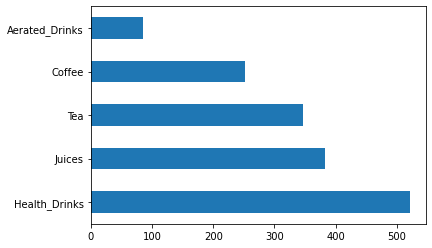

In [51]:
#Visualising the count of items present in each category from all the three websites
total_dataset['Category'].value_counts().plot(kind='barh')

From the above visualization, we can conclude that health drinks items are more in number compared to the other categories. The count which we are getting is the total of all the three websites. 

### Extracting vendor wise category information 

In [52]:
d=total_dataset.groupby(['Vendor','Category'], as_index=False)[['Product_Name']].count()
d.rename(columns={'Product_Name':'Count'},inplace=True)
d

,Vendor,Category,Count
0,Bigbasket,Aerated_Drinks,8
1,Bigbasket,Coffee,79
2,Bigbasket,Health_Drinks,295
3,Bigbasket,Juices,124
4,Bigbasket,Tea,140
5,Flipkart,Aerated_Drinks,34
6,Flipkart,Coffee,160
7,Flipkart,Health_Drinks,160
8,Flipkart,Juices,160
9,Flipkart,Tea,160


### Visualising the categories and vendors

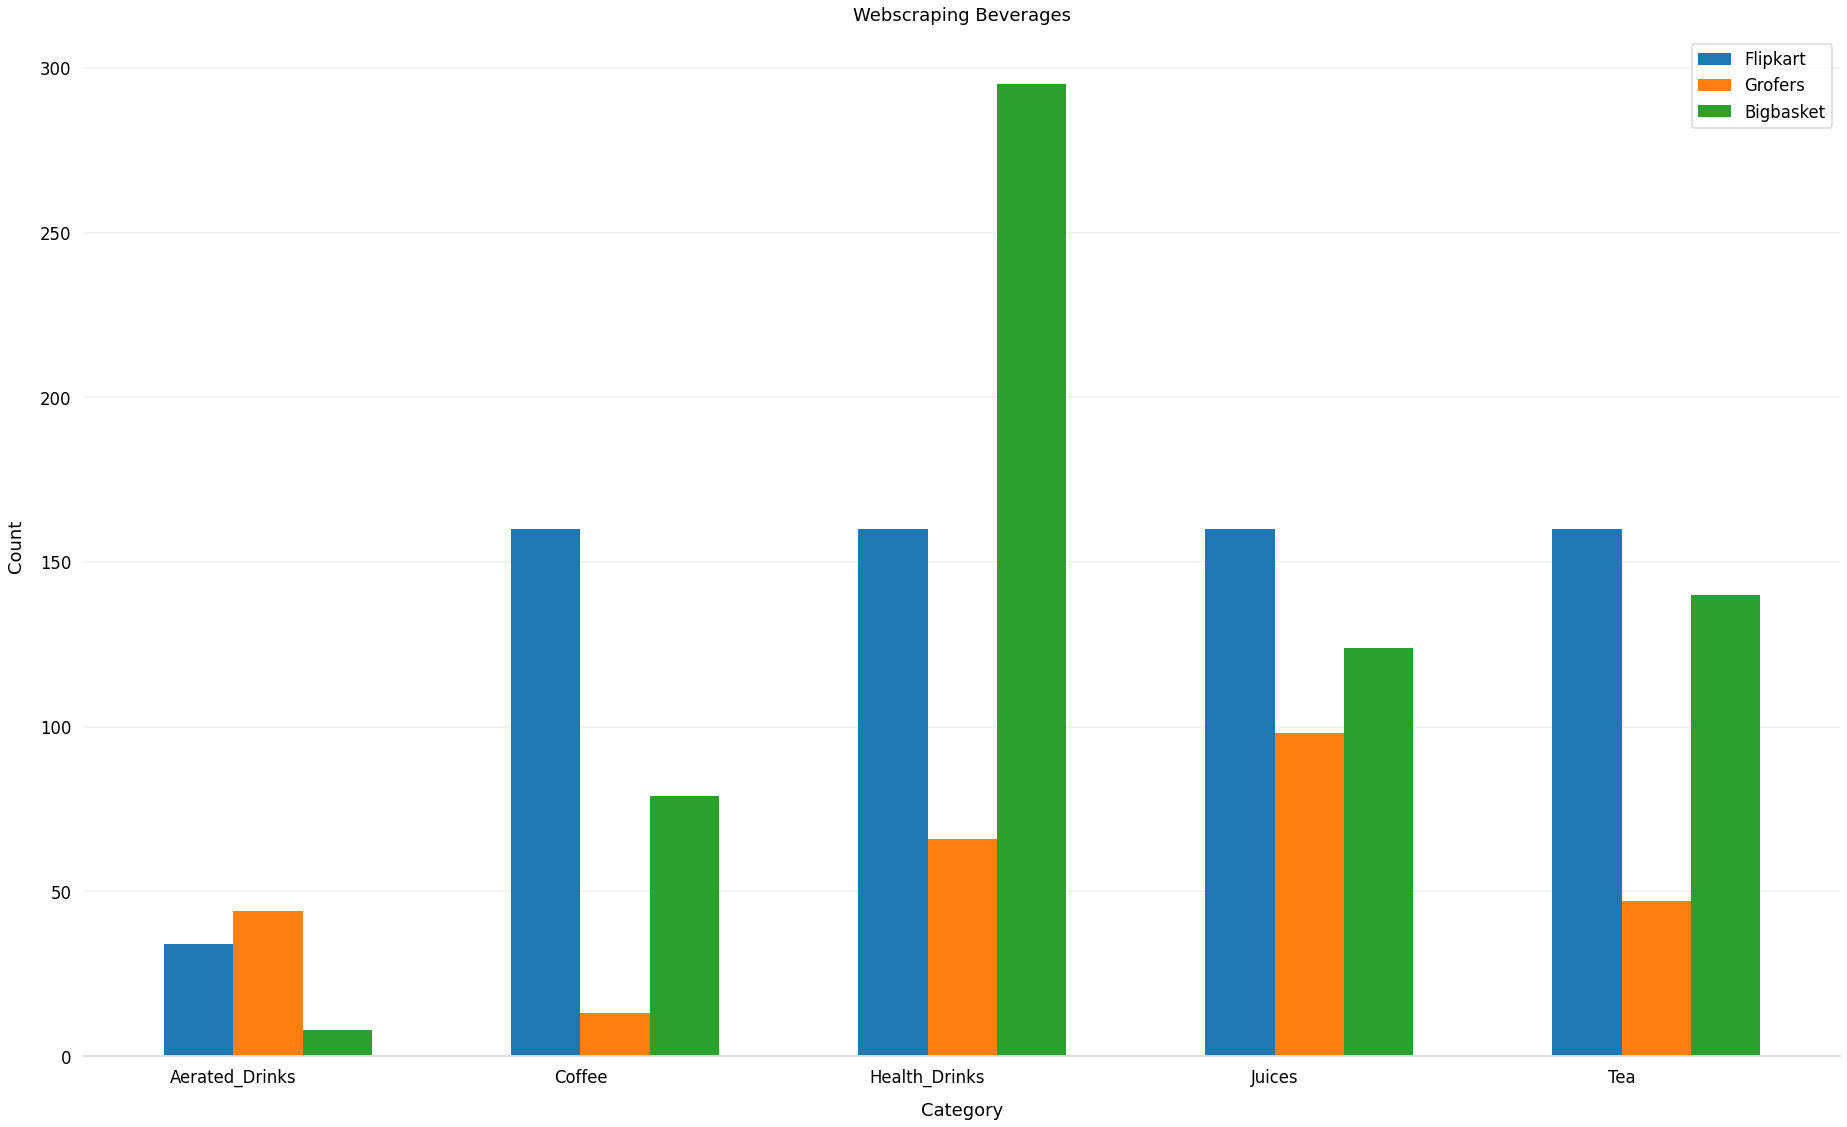

In [53]:
# Use Seaborn's context settings to make fonts larger.
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(26, 16))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
#x = np.arange(len(d.Category.unique()))
x = np.arange(len(d.Category.unique()))


# Define bar width. We need this to offset the second bar.
bar_width = 0.2

b1 = ax.bar(x, d.loc[d['Vendor'] == 'Flipkart', 'Count'],
            width=bar_width, label='Flipkart')

# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, d.loc[d['Vendor'] == 'Grofers', 'Count'],
            width=bar_width, label='Grofers')

b3 = ax.bar(x + (2*bar_width), d.loc[d['Vendor'] == 'Bigbasket', 'Count'], 
            width = bar_width, label = 'Bigbasket')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(d.Category.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Category', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Webscraping Beverages', pad=15)

fig.tight_layout()

Here, we can see the visualisation of the categories such as Aerated drinks, Coffee, health drinks, Juices and tea with respect to the vendors such as Flipkart, Bigbasket and Grofers

Here, we got the count based on vendor and category. 

Here are the insights :

1. All the three are competative ecommerce websites. 

2. From this, we can say that the big basket is having highest number of health drinks and it is having the lowest number of      aerated drinks compared to flipkart and grofers. 

3. Flipkart is maintaing consistency in displaying the items on the website.

4. Grofers is having more number of juices among the five categories.

5. Aerated drinks is the category where there are least number of items on all the three websites.

6. Grofers is having more Juice items and the least caffine products. 

## RECOMMENDATIONS TO THE CUSTOMERS

### Finding the beverages item from three websites which is having lowest price by giving an input

In [54]:
print ("Sample Beverages : Tea, Coffee, Juice, Horlicks")

key = input("Enter the Product Name: ")

if total_dataset['Product_Name'].str.contains(key).any():
    print ("Item found")    
    df_temp = total_dataset[total_dataset['Product_Name'].str.contains(key)] 
    df_temp1 = df_temp[df_temp.Selling_Price == df_temp.Selling_Price.min()]
    display(df_temp1)
    
else:
    print ("Item not found")

Sample Beverages : Tea, Coffee, Juice, Horlicks
Enter the Product Name: Tea
Item found


,Category,Product_Name,Quantity,Units,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
930,Tea,Nestea Ready to Drink Peach Flavour Iced Tea,200,ml,25.0,0.0,25.0,Grofers


### Finding the number of items sold on three websites by giving an input

In [55]:
print(total_dataset['Category'].unique())
key = input("Enter any Category Name displayed above to get Vendor wise count: ")
total_dataset[total_dataset['Category'].str.lower()==key.lower()].groupby(['Vendor']).size().reset_index(name='counts')

['Juices' 'Coffee' 'Tea' 'Aerated_Drinks' 'Health_Drinks']
Enter any Category Name displayed above to get Vendor wise count: Coffee


,Vendor,counts
0,Bigbasket,79
1,Flipkart,160
2,Grofers,13


### Finding the desired item with maximum discount

In [56]:
print(total_dataset['Category'].unique())
key = input("Enter any Category Name displayed above to get product list with top discounts: ")

total_dataset[total_dataset['Category'].str.lower()==key.lower()].nlargest(10, ['Discount_Percentage'])

['Juices' 'Coffee' 'Tea' 'Aerated_Drinks' 'Health_Drinks']
Enter any Category Name displayed above to get product list with top discounts: Coffee


,Category,Product_Name,Quantity,Units,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
267,Coffee,N2B Organic Masala Green Coffee Beans Powder 2...,3 x 230,g,3597.0,79.0,725.0,Flipkart
281,Coffee,Vihado Best Quality 100% Natural Green Coffee ...,5 x 10,g,1245.0,75.0,299.0,Flipkart
291,Coffee,Vihado Green Coffee Beans Organic for Weight L...,6 x 16.67,g,2094.0,75.0,514.0,Flipkart
178,Coffee,VIHADO Pure Green Coffee Beans for Weight Loss...,3 x 100,g,1047.0,74.0,269.0,Flipkart
212,Coffee,N2B Organic Green Coffee Beans for Weight Loss...,2 x 100,g,898.0,72.0,248.0,Flipkart
217,Coffee,N2B Organic Green Coffee Beans Powder with Lim...,230,g,1199.0,71.0,338.0,Flipkart
294,Coffee,N2B Organic Masala Green Coffee Beans Powder 2...,230,g,1199.0,71.0,337.0,Flipkart
296,Coffee,Vihado Best Quality Pure Green Coffee Beans fo...,4 x 25,g,1396.0,71.0,394.0,Flipkart
292,Coffee,Sinew Nutrition Organic Green Coffee Beans Pow...,2 x 350,g,1998.0,70.0,599.0,Flipkart
256,Coffee,VedaneQ Green Coffee Beans Weight loss Unroast...,300,g,849.0,67.0,275.0,Flipkart


### Finding the desired juice with maximum discounts

In [57]:
print("Apple, Mango, Orange, Lychee, Grape, Banana")

key = input("Enter any fruit Name displayed above to get product list with top discounts: ")
total_dataset[total_dataset['Product_Name'].str.lower().str.contains(key.lower())].nlargest(10, ['Discount_Percentage'])

Apple, Mango, Orange, Lychee, Grape, Banana
Enter any fruit Name displayed above to get product list with top discounts: Orange


,Category,Product_Name,Quantity,Units,Maximum_Retail_Price,Discount_Percentage,Selling_Price,Vendor
461,Tea,Bleuretté Loose Black Tea with Orange Orange B...,0,NaN,799.0,50.0,395.00,Flipkart
406,Tea,Navvayd Lopchu Golden Orange Pekoe Black Tea U...,0,NaN,600.0,33.0,399.00,Flipkart
980,Juices,Valencia Orange Cold Pressed Juice - 100% Natural,2x1,L,600.0,30.0,570.00,Bigbasket
921,Aerated_Drinks,Gatorade Orange Flavour Powder Mix Sports Drin...,5x25g + Sipper Free,ee,199.0,25.0,149.00,Grofers
1247,Health_Drinks,"Sports Powder Mix - Orange Flavour, Sipper Pack",125,g,199.0,25.0,149.25,Bigbasket
1391,Health_Drinks,Glucose Based Beverage Mix - Orange,1,kg,310.0,22.0,288.30,Bigbasket
902,Juices,Real Fruit Power Orange Juice,1,L,105.0,19.0,85.00,Grofers
903,Juices,Real Fruit Power Orange Juice - Pack of 2,2x1,L,210.0,19.0,170.00,Grofers
1056,Juices,"Juice - Fruit Power, Orange/Santra",1,L,105.0,19.0,85.00,Bigbasket
1057,Juices,Fruit Power Juice - Orange/Santra,3x1,L,315.0,19.0,255.00,Bigbasket


In [58]:
##################### THE END ###########################